In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

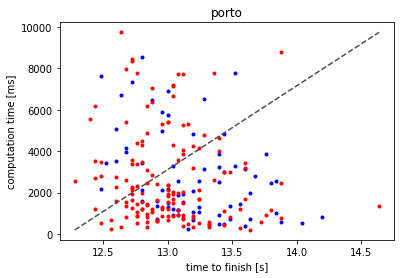

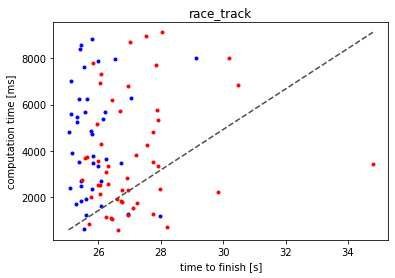

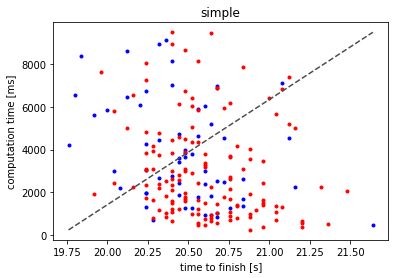

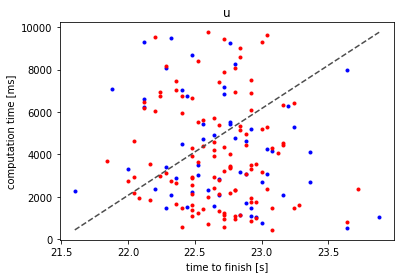

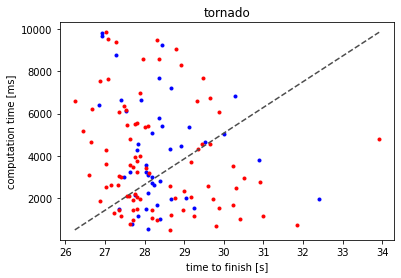

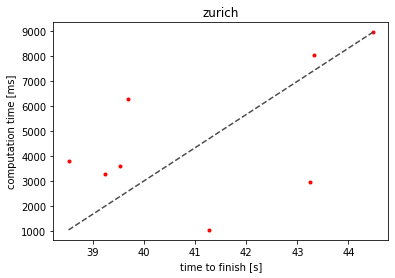

In [42]:
names = ["porto", "race_track", "simple", "u", "tornado", "zurich"]

for name in names:
    csv = pd.read_csv(name + ".csv")
    successful = csv[csv["found solution"] == "yes"]
    successful

    sehs = successful[successful["algorithm"] == "sehs"]
    hybrid = successful[successful["algorithm"] == "hybrid_astar"]

    plt.title(name)
    plt.plot(sehs["time to finish"], sehs["average computation time in ms"], "b.", label="SEHS")
    plt.plot(hybrid["time to finish"], hybrid["average computation time in ms"], "r.", label="Hybrid A*")
    plt.plot([min(successful["time to finish"]), max(successful["time to finish"])], [min(successful["average computation time in ms"]), max(successful["average computation time in ms"])], ls="--", c=".3")
    plt.xlabel("time to finish [s]")
    plt.ylabel("computation time [ms]")
    plt.show()

In [4]:
import re

max_rpm = 17500

def complexity(row):
    a = float(row[1]["number of actions"])
    d = row[1]["discretization"]
    x = re.search("rpm-([\d.]+)-theta-([\d.]+)", d)
    rpm = float(x.group(1))
    theta = float(x.group(2))
    return a * (max_rpm / rpm) * (360.0 / theta)
    
def complexities(rows):
    return [complexity(r) for r in rows.iterrows()]


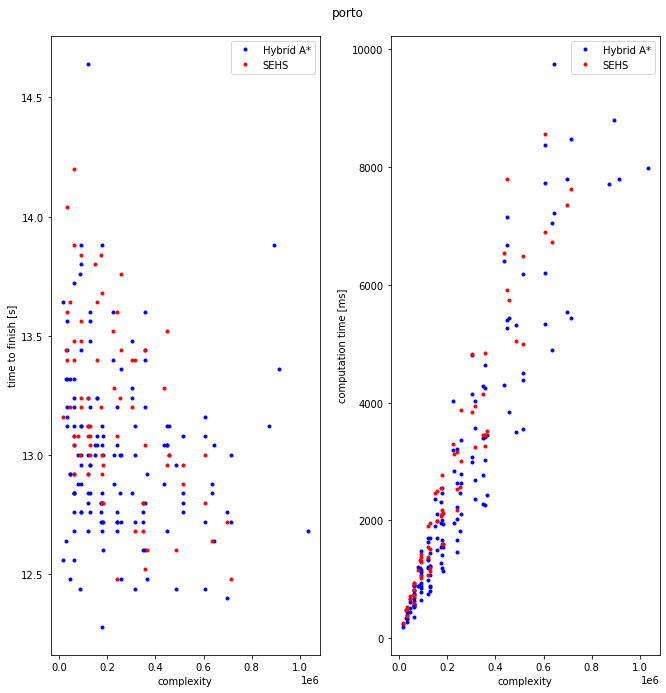

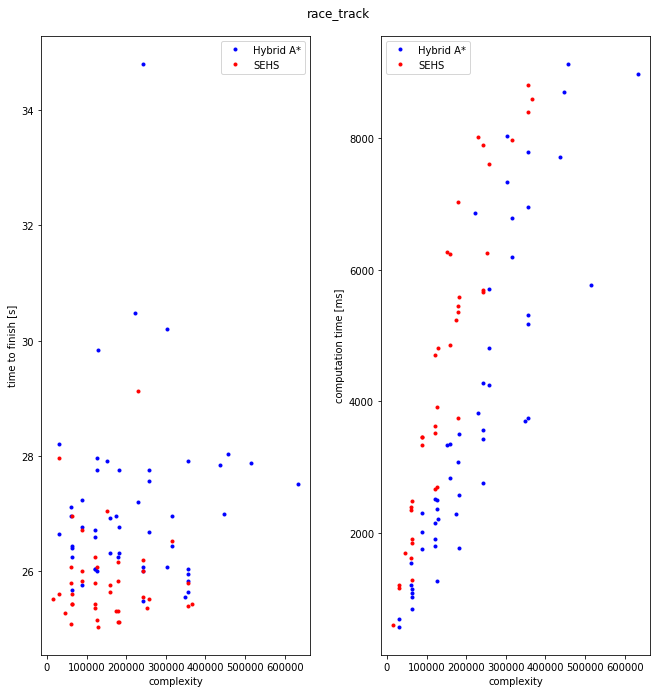

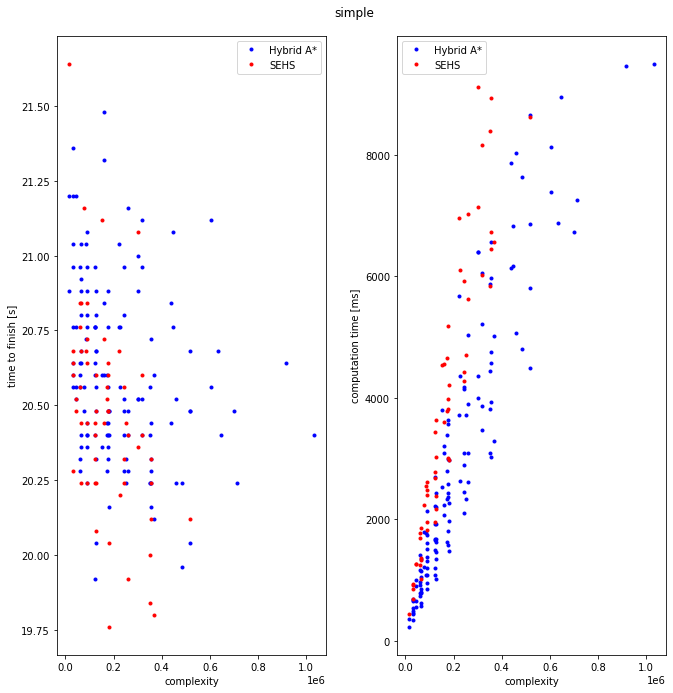

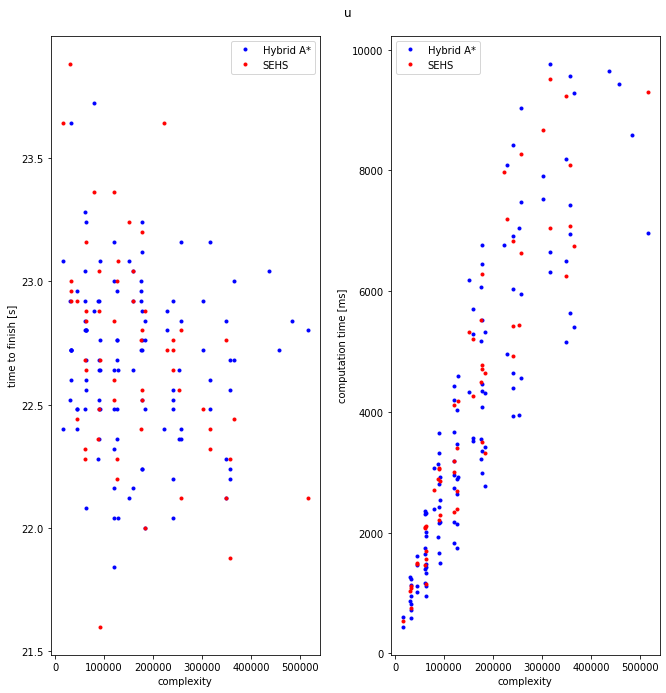

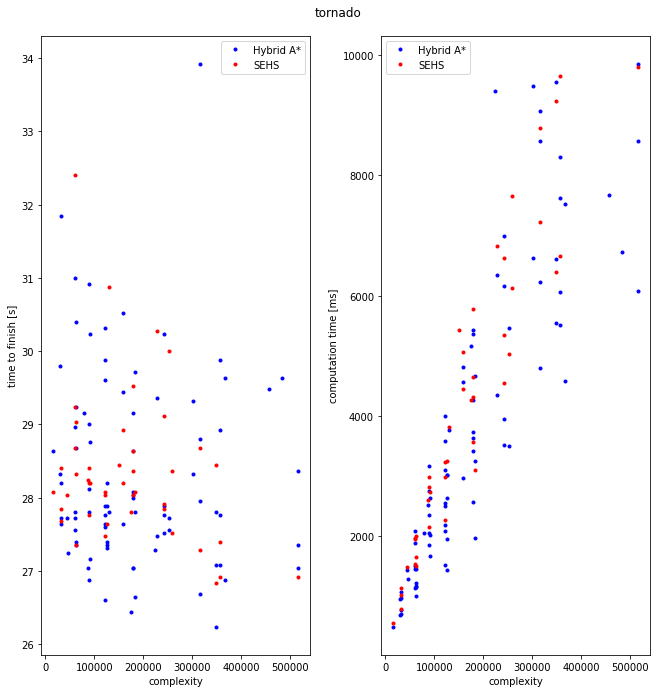

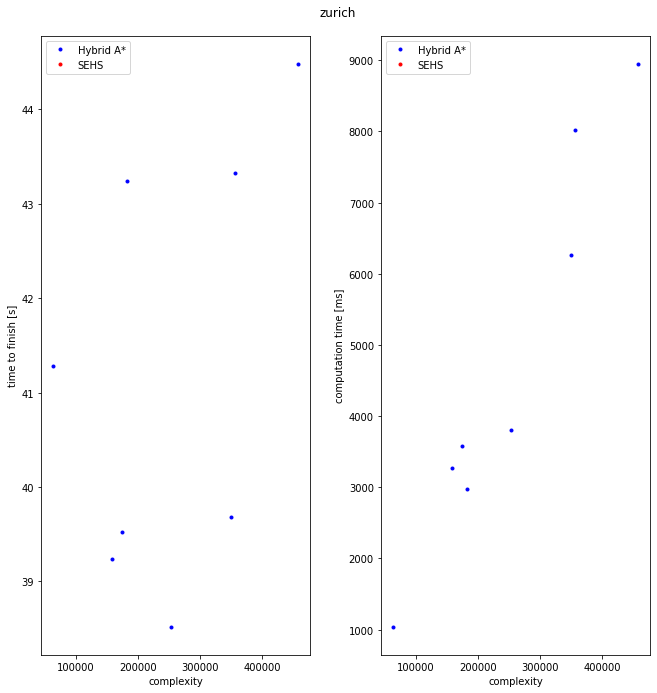

In [46]:
selected_actions = 88
selected_discretization = "rpm-875-theta-20"

def analyze(name):
    csv = pd.read_csv(name + ".csv")
    successful = csv[csv["found solution"] == "yes"]
    successful

    sehs = successful[successful["algorithm"] == "sehs"]
    sehs_higlight = sehs[(sehs["number of actions"] == selected_actions) & (sehs["discretization"].str.endswith(selected_discretization))]
    hybrid = successful[successful["algorithm"] == "hybrid_astar"]
    hybrid_highlight = hybrid[(hybrid["number of actions"] == selected_actions) & (hybrid["discretization"].str.endswith(selected_discretization))]

    fig, (ax1, ax2) = plt.subplots(1, 2, sharex="row", figsize=(10, 10))
    fig.tight_layout(pad=4.0)
    
    fig.suptitle(name)
    
    ax1.plot(complexities(hybrid), hybrid["time to finish"], "b.", label="Hybrid A*")
    #ax1.plot(complexities(hybrid_highlight), hybrid_highlight["time to finish"], "b.", label="Hybrid A* with the selected params")
    
    ax1.plot(complexities(sehs), sehs["time to finish"], "r.", label="SEHS")
    #ax1.plot(complexities(sehs_higlight), sehs_higlight["time to finish"], "r.", label="SEHS with the selected params")
    
    ax1.set_xlabel("complexity")
    ax1.set_ylabel("time to finish [s]")
    
    ax1.legend()

    ax2.plot(complexities(hybrid), hybrid["average computation time in ms"], "b.", label="Hybrid A*")
    #ax2.plot(complexities(hybrid_highlight), hybrid_highlight["average computation time in ms"], "b.", label="Hybrid A* with the selected params")
    
    ax2.plot(complexities(sehs), sehs["average computation time in ms"], "r.", label="SEHS")
    #ax2.plot(complexities(sehs_higlight), sehs_higlight["average computation time in ms"], "r.", label="SEHS with the selected params")
    
    ax2.legend()

    ax2.set_ylabel("computation time [ms]")
    ax2.set_xlabel("complexity")
    
    plt.legend()
    plt.savefig(name + ".pdf")

for name in names:
    analyze(name)
